# Visualisation: An Introduction to Matplotlib and Seaborn

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Danselem/brics_astro/blob/main/Week3/01_visualisation.ipynb)


<div style="text-align: center;">
  <img src="https://miro.medium.com/v2/resize:fit:950/1*BxTr23ZW6brtURoVtuorVQ.png" width="800"/>
</div>

Welcome back! As astronomers, we gather data – lots of it! Numbers in tables are useful, but our brains are wired to understand patterns and relationships much better when we see them. Data visualisation is the art and science of representing data graphically to reveal insights, trends, and structures that might be hidden in raw numbers.

In Python, the two most fundamental libraries for creating plots are **Matplotlib** and **Seaborn**.

*   **Matplotlib:** The foundational library. It provides a highly flexible base for creating all sorts of static, interactive, and animated visualisations. Think of it as your drawing toolkit.
*   **Seaborn:** Built on top of Matplotlib. It specializes in creating aesthetically pleasing and informative statistical graphics. It often requires less code for common plot types and handles complex data structures (like Pandas DataFrames) very smoothly. Think of it as providing easier-to-use templates and styles for common data analysis plots.

This notebook will introduce you to the basics of creating visualisations using both libraries, simulating some astronomical data along the way to make our examples practical and relevant.

**Learning Objectives:**

*   Understand the importance of data visualisation in astronomy.
*   Learn the basic structure of a Matplotlib plot (Figure and Axes).
*   Create common plot types: Scatter Plots, Line Plots, Histograms, Bar Plots.
*   Add labels, titles, and legends to plots.
*   Understand how to simulate simple astronomical data using NumPy.
*   Use Seaborn to create enhanced statistical plots easily.
*   Apply visualisation techniques to simulated astronomical data.

**Prerequisites:**

*   Basic familiarity with Python syntax (variables, data types, lists).
*   Basic understanding of NumPy arrays and Pandas DataFrames (refer to previous notebooks in the previous weeks if needed).


**Key Terms:**

*   **Data visualisation:** Representing data graphically to explore, analyze, and communicate information.
*   **Matplotlib:** A fundamental Python plotting library.
*   **Seaborn:** A Python library for creating statistical graphics, built on Matplotlib.
*   **Figure:** The overall window or page that contains your plot(s).
*   **Axes (or Subplot):** The individual plotting area within a Figure where data is actually plotted (the region with the x and y axes). A Figure can have multiple Axes.
*   **Scatter Plot:** Shows the relationship between two numerical variables as points.
*   **Line Plot:** Shows a trend or change in a numerical variable over another (often time or position).
*   **Histogram:** Shows the distribution of a single numerical variable by dividing the data into bins and counting how many values fall into each bin.
*   **Bar Plot:** Compares values across different categories.


## Why Visualise with Matplotlib and Seaborn?

While tables of numbers are essential, visual representations allow us to quickly grasp patterns, outliers, and relationships in data that are hard to spot otherwise. In astronomy, this might mean visualizing:

*   The relationship between a star's temperature and its brightness.
*   How the light from a variable star changes over time.
*   The distribution of distances to galaxies in a survey.
*   The relative counts of different types of objects observed.

## Simulating Our Data

To demonstrate the different plot types, we will create some simple, simulated astronomical data using the NumPy and Pandas libraries. This allows us to have relevant examples without needing external data files immediately. We will create data for:

*   Star Mass vs. Luminosity
*   Variable Star Brightness Over Time
*   Distribution of Galaxy Redshifts
*   Count of Different Object Types
*   Exoplanet Properties (for Seaborn examples)

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt # The standard plotting interface
import seaborn as sns           # For statistical graphics
import numpy as np              # For numerical operations and data generation
import pandas as pd             # For working with tabular data (DataFrames)

# --- Data Simulation Code ---
# Scenario 1: Star Mass vs. Luminosity (Scatter Plot Example)
num_stars = 100
star_masses = np.random.lognormal(mean=0., sigma=0.5, size=num_stars) * 0.5 + 0.1
star_luminosities = star_masses**3.5 * np.random.normal(1.0, 0.3, size=num_stars)

# Scenario 2: Variable Star Brightness Over Time (Line Plot Example)
num_time_points = 50
time_points = np.arange(num_time_points)
brightness_signal = 5 + 2 * np.sin(time_points / 5 * np.pi)
brightness_noise = np.random.normal(0, 0.5, size=num_time_points)
variable_star_brightness = brightness_signal + brightness_noise

# Scenario 3: Distribution of Galaxy Redshifts (Histogram Example)
num_galaxies = 500
galaxy_redshifts = np.random.gamma(shape=2.0, scale=0.1, size=num_galaxies)

# Scenario 4: Count of Different Object Types (Bar Plot Example)
object_types = ['Star', 'Galaxy', 'Quasar', 'Nebula', 'Star Cluster']
object_counts = np.array([150, 75, 20, 40, 35])

# Scenario 5: Exoplanet Properties (DataFrame for Seaborn Examples)
exoplanet_data_dict = {
    'Planet Name': [f'Exo-{i:03d}' for i in range(20)],
    'Type': np.random.choice(['Gas Giant', 'Super-Earth', 'Neptune-like'], size=20),
    'Orbital_Period_Days': np.random.lognormal(mean=1.5, sigma=1.0, size=20) + 1,
    'Radius_Earth': np.random.lognormal(mean=0., sigma=0.4, size=20) * 5 + 0.5
}
exoplanets_df = pd.DataFrame(exoplanet_data_dict)
exoplanets_df['Type'] = exoplanets_df['Type'].astype('category')

exoplanets_df.head()

,Planet Name,Type,Orbital_Period_Days,Radius_Earth
0,Exo-000,Neptune-like,10.570501,5.866134
1,Exo-001,Neptune-like,9.431618,2.631607
2,Exo-002,Super-Earth,17.788973,3.168798
3,Exo-003,Neptune-like,4.080576,3.127169
4,Exo-004,Neptune-like,3.326556,5.397618


## Matplotlib Basics: Figure and Axes

In Matplotlib, every plot resides within a **Figure**. Think of the Figure as the overall window or canvas where your visualization will appear. Inside the Figure, you create one or more **Axes** (also often called subplots). The Axes is the actual plotting area where your data points, lines, bars, etc., are drawn, complete with x and y axes, tick marks, and labels.

The most common way to start a plot is by using the `plt.subplots()` function. This function conveniently creates both a `Figure` and a single `Axes` object for you:

```python
fig, ax = plt.subplots()
```

Once you have the `ax` (Axes) object, you call various plotting methods on it, such as `ax.scatter()`, `ax.plot()`, `ax.hist()`, `ax.bar()`, passing your data as arguments.


## Common Plot Types with Matplotlib

Let's generate some basic plot types using the simulated data and Matplotlib's `ax` object methods.

### Scatter Plots

**Purpose:** To show the relationship or correlation between two numerical variables. Each data point is represented by a marker.

**Method:** `ax.scatter(x_values, y_values)`

**Example 1:** Simple Scatter Plot - Star Mass vs. Luminosity)

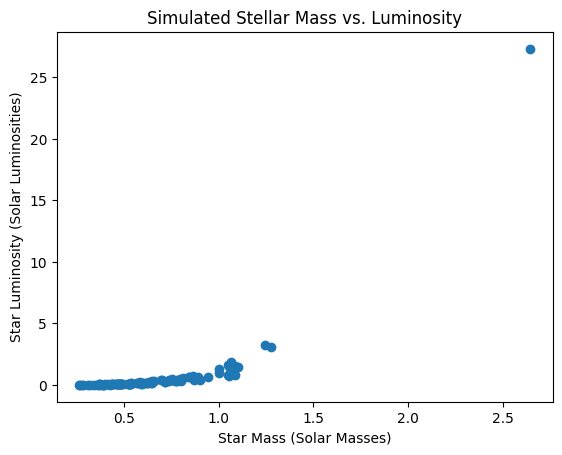

In [3]:
# Use the simulated star_masses and star_luminosities

# 1. Create a Figure and Axes
fig, ax = plt.subplots()

# 2. Plot the data on the Axes using the scatter method
ax.scatter(star_masses, star_luminosities)

# 3. Add labels and a title for clarity
ax.set_xlabel("Star Mass (Solar Masses)")
ax.set_ylabel("Star Luminosity (Solar Luminosities)")
ax.set_title("Simulated Stellar Mass vs. Luminosity")

# 4. Display the plot
plt.show()

### Scatter Plot - Exoplanet Period vs. Radius

Let's apply a scatter plot to our exoplanet data, which is stored in a Pandas DataFrame. We'll plot the orbital period against the planet's radius.

**Example 2:** Scatter Plot - Exoplanet Period vs. Radius)

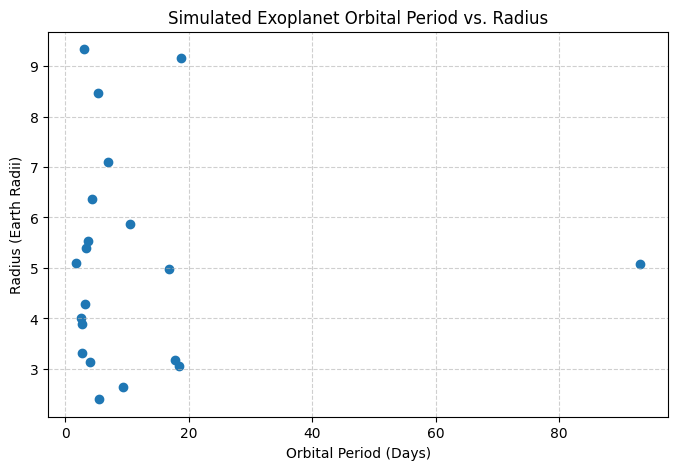

In [4]:
# Use data from the exoplanets_df DataFrame
periods = exoplanets_df['Orbital_Period_Days']
radii = exoplanets_df['Radius_Earth']

fig, ax = plt.subplots(figsize=(8, 5)) # Optional: Set figure size for better readability

ax.scatter(periods, radii)

ax.set_xlabel("Orbital Period (Days)")
ax.set_ylabel("Radius (Earth Radii)")
ax.set_title("Simulated Exoplanet Orbital Period vs. Radius")

# Add a grid for easier reading of values
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

## Line Plots

**Purpose:** To show a trend or change in a numerical variable over a continuous sequence, like time or position along a path.

**Method:** `ax.plot(x_values, y_values)`

**Example 3:** Line Plot - Variable Star Light Curve)

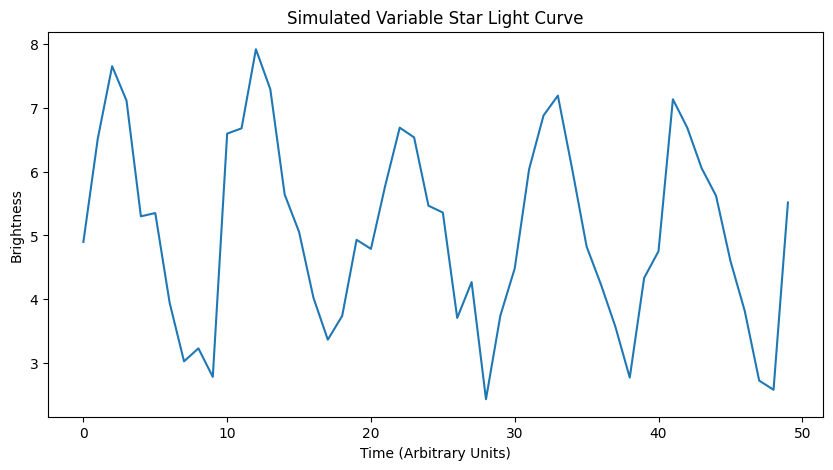

In [6]:
# Use the simulated time_points and variable_star_brightness

fig, ax = plt.subplots(figsize=(10, 5)) # Make it wider to see the time trend

ax.plot(time_points, variable_star_brightness)

ax.set_xlabel("Time (Arbitrary Units)")
ax.set_ylabel("Brightness")
ax.set_title("Simulated Variable Star Light Curve")

plt.show()

### Histograms

**Purpose:** To show the distribution of a single numerical variable. It divides the range of data into "bins" and counts how many data points fall into each bin, displayed as bars.

**Method:** `ax.hist(data, bins=number_of_bins)`

**Example 4:** Histogram - Galaxy Redshift Distribution)

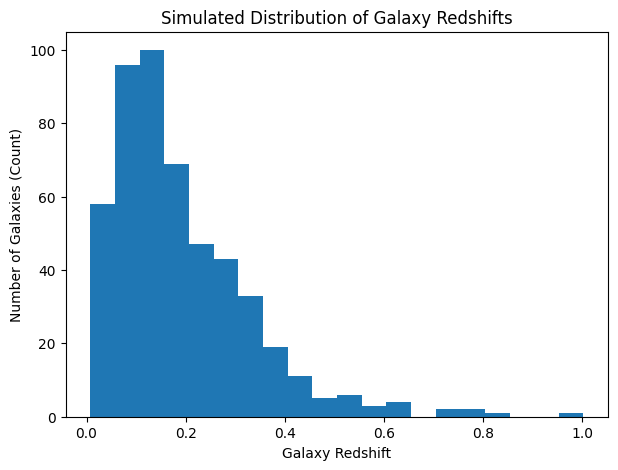

In [7]:
# Use the simulated galaxy_redshifts

fig, ax = plt.subplots(figsize=(7, 5))

ax.hist(galaxy_redshifts, bins=20) # We choose to divide the data into 20 bins

ax.set_xlabel("Galaxy Redshift")
ax.set_ylabel("Number of Galaxies (Count)")
ax.set_title("Simulated Distribution of Galaxy Redshifts")

plt.show()

## Bar Plots

**Purpose:** To compare discrete values across different categories. Each category has a bar whose length represents the value.

**Method:** `ax.bar(category_labels, category_values)`

**Example 5:** Bar Plot - Count of Object Types)

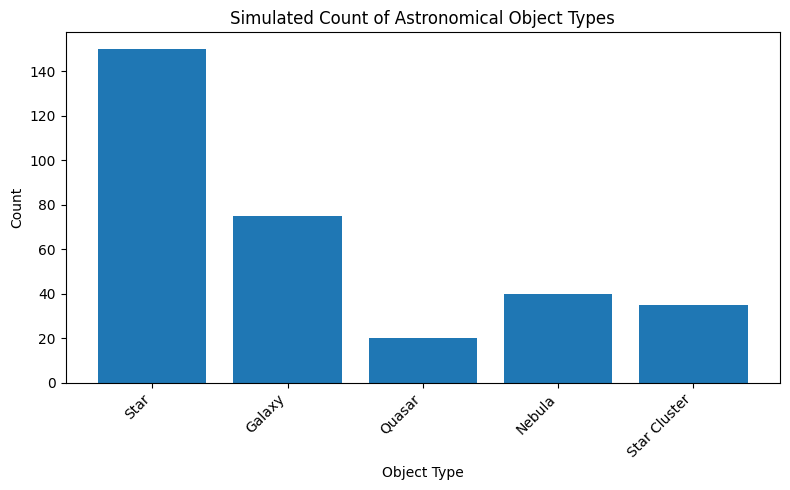

In [8]:
# Use the simulated object_types (our categories) and object_counts (our values)

fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(object_types, object_counts)

ax.set_xlabel("Object Type")
ax.set_ylabel("Count")
ax.set_title("Simulated Count of Astronomical Object Types")

# Rotate x-axis labels if they are long and overlap
plt.xticks(rotation=45, ha='right') # Rotate labels by 45 degrees, align text to the right of the tick

plt.tight_layout() # Automatically adjust plot parameters for a tight layout
plt.show()

## Customizing Plots: Labels, Titles, Legends, and Appearance

Adding informative text and adjusting the appearance are key to making your plots understandable and visually appealing. You can control many aspects of the plot through the `ax` object and the arguments of the plotting methods.

*   Adding Labels: `ax.set_xlabel("Your Label")`, `ax.set_ylabel("Your Label")`.
*   Adding Titles: `ax.set_title("Your Title")` for the Axes title, `fig.suptitle("Overall Title")` for a title covering the whole Figure (useful with multiple subplots).
*   Adding Legends: If you add a `label='...'` argument to your plotting calls (like `ax.plot()` or `ax.scatter()`), you can then call `ax.legend()` to display these labels in a legend box.
*   Customizing Appearance: Arguments like `color`, `linestyle`, `marker`, `s` (size for scatter points), `alpha` (transparency), etc., can be passed to the plotting methods.

**Example 6:** Line Plot with Color and Label)


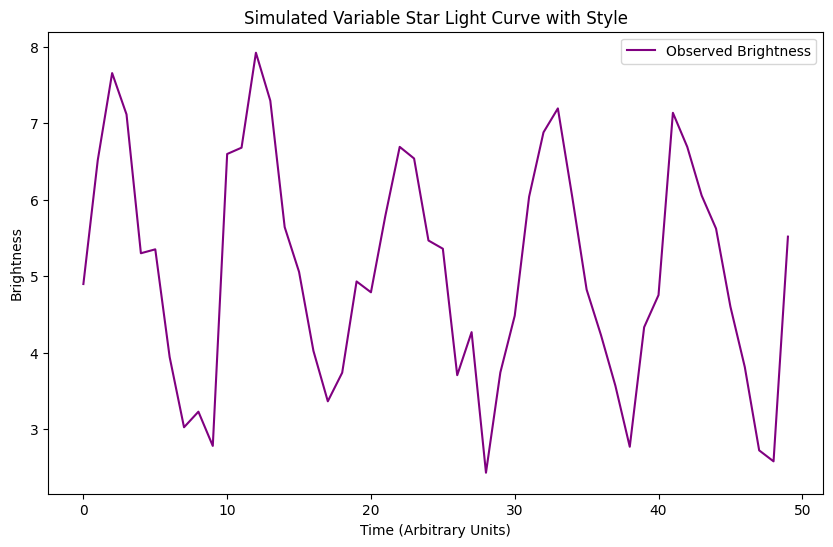

In [9]:
# Use the simulated time_points and variable_star_brightness

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data with specific color, line style, and a label for the legend
ax.plot(time_points, variable_star_brightness, color='purple', linestyle='-', label='Observed Brightness')

ax.set_xlabel("Time (Arbitrary Units)")
ax.set_ylabel("Brightness")
ax.set_title("Simulated Variable Star Light Curve with Style")

# Add a legend to show the label we provided in ax.plot()
ax.legend()

plt.show()

**Example 7:** Scatter Plot with Colors based on Type)

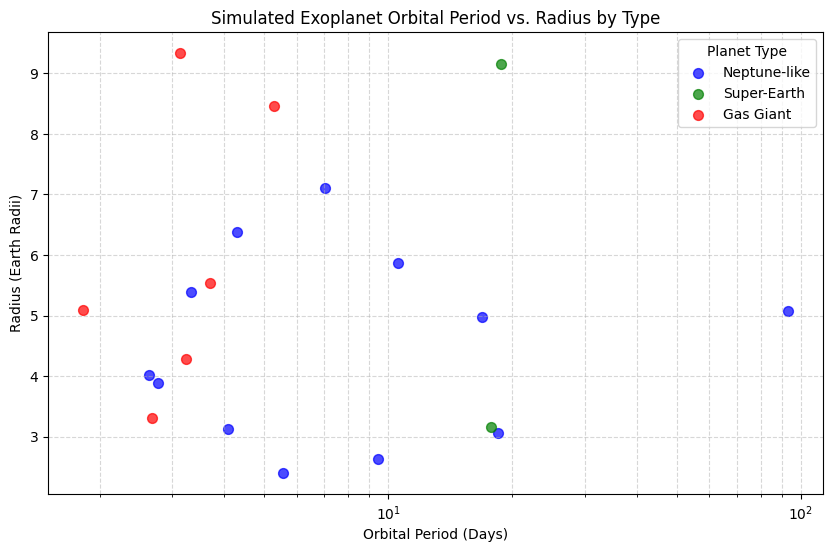

In [10]:
# Use exoplanets_df. We want to plot different 'Type' categories with different colors.

fig, ax = plt.subplots(figsize=(10, 6)) 

# Get the unique planet types from the DataFrame column
unique_types = exoplanets_df['Type'].unique()

# Define a list of colors, one for each type (make sure you have enough colors!)
colors = ['blue', 'green', 'red']

# Loop through each unique planet type
for i, planet_type in enumerate(unique_types):
    # Filter the DataFrame to get only the rows for the current planet type
    subset_df = exoplanets_df[exoplanets_df['Type'] == planet_type]
    # Plot this subset of data
    ax.scatter(subset_df['Orbital_Period_Days'], subset_df['Radius_Earth'],
               color=colors[i],          # Use the color corresponding to this type
               label=planet_type,        # Use the type name as the label for the legend
               alpha=0.7,                # Make points slightly transparent to see overlap
               s=50)                     # Set point size

# Add labels and title
ax.set_xlabel("Orbital Period (Days)")
ax.set_ylabel("Radius (Earth Radii)")
ax.set_title("Simulated Exoplanet Orbital Period vs. Radius by Type")

# It's common for orbital periods to be plotted on a logarithmic scale because they vary greatly
ax.set_xscale('log')
ax.grid(True, which='both', linestyle='--', alpha=0.5) # Add a grid to help read values

# Add a legend to identify the different colored points
ax.legend(title="Planet Type")

plt.show()

## Introducing Seaborn

Seaborn is a library specifically designed to make creating statistical graphics in Python easier and more visually appealing. It is built on top of Matplotlib, meaning you can often use Matplotlib functions to further customize plots created with Seaborn.

Seaborn works particularly well with structured data like Pandas DataFrames. Many Seaborn plotting functions can take the DataFrame itself as the `data` argument, and then you just specify the column names for the `x`, `y`, `hue`, etc., arguments. This often reduces the amount of code needed compared to pure Matplotlib, especially when you want to color or separate data based on categories.

### Seaborn Scatter Plots

**Method:** `sns.scatterplot(data=dataframe, x='column_x', y='column_y', ...)`

Seaborn's scatterplot has nice default styling and integrates easily with DataFrames. The `hue` argument is especially powerful for coloring points by category.

**Example 8:** Seaborn Scatter Plot - Exoplanet Period vs. Radius (Basic)

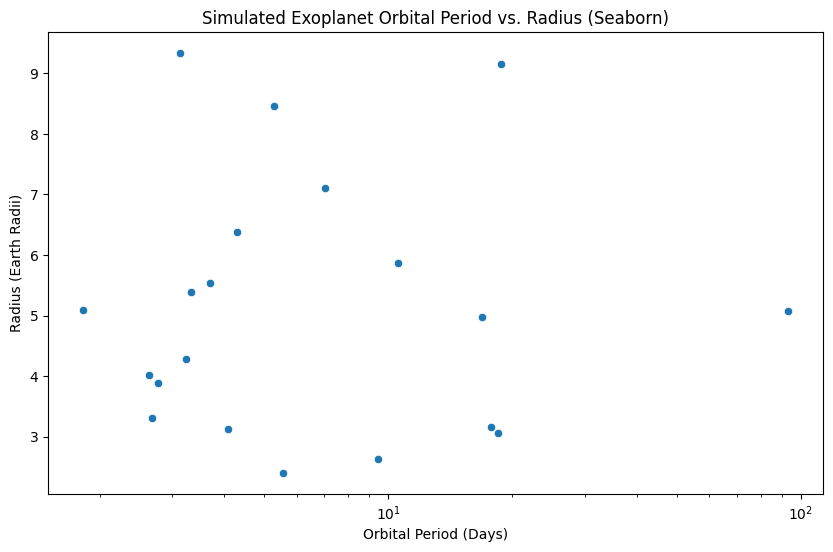

In [11]:
# Use the exoplanets_df DataFrame

fig, ax = plt.subplots(figsize=(10, 6))

# Use sns.scatterplot, specifying the dataframe and column names for x and y
sns.scatterplot(data=exoplanets_df, x='Orbital_Period_Days', y='Radius_Earth', ax=ax)

# Add labels and title using the Matplotlib axes object
ax.set_xlabel("Orbital Period (Days)")
ax.set_ylabel("Radius (Earth Radii)")
ax.set_title("Simulated Exoplanet Orbital Period vs. Radius (Seaborn)")
ax.set_xscale('log') # Still use log scale for x-axis

plt.show()

**Example 9:** Seaborn Scatter Plot - Period vs. Radius with `hue` by Type

The seaborn's `hue` argument makes it easy to colour points based on a categorical column.

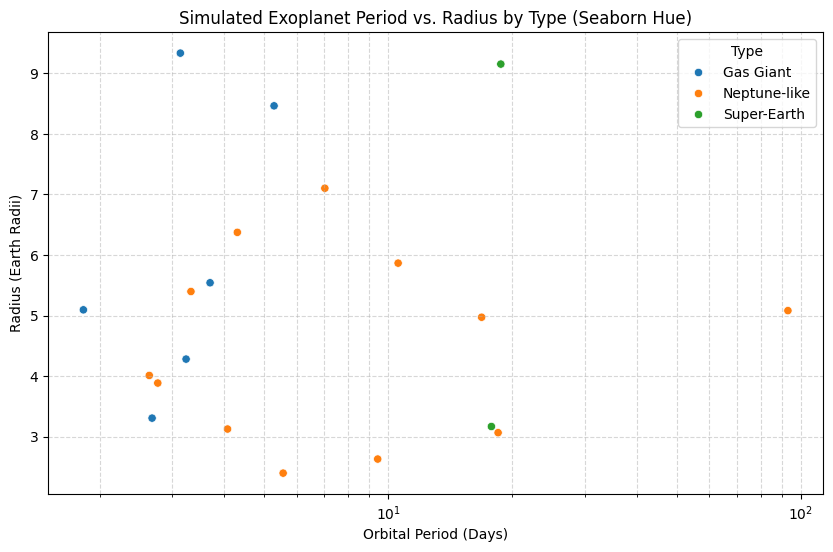

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

# Use 'hue' and pass the column name 'Type'
sns.scatterplot(data=exoplanets_df, x='Orbital_Period_Days', y='Radius_Earth',
                hue='Type', # Color points based on the 'Type' column
                ax=ax)

ax.set_xlabel("Orbital Period (Days)")
ax.set_ylabel("Radius (Earth Radii)")
ax.set_title("Simulated Exoplanet Period vs. Radius by Type (Seaborn Hue)")
ax.set_xscale('log')
ax.grid(True, which='both', linestyle='--', alpha=0.5)

plt.show()

### Seaborn Histograms

**Method:** `sns.histplot(data=data_array_or_series, bins=..., ax=...)` or `sns.histplot(data=dataframe, x='column_name', bins=..., ax=...)`

Seaborn's `histplot` is a versatile histogram function with several useful options.

**Example 10:** Seaborn Histogram - Galaxy Redshift Distribution

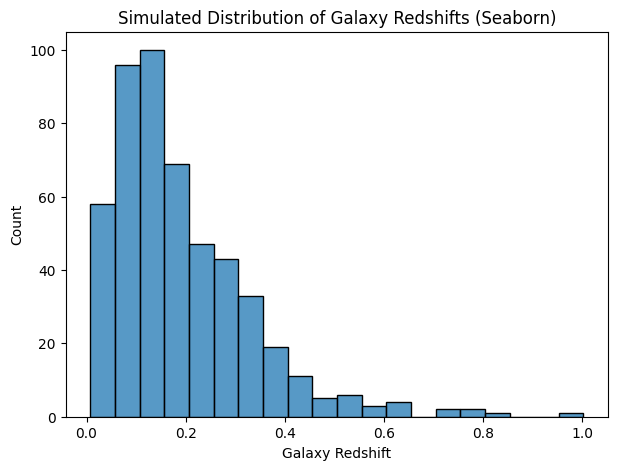

In [13]:
# Use the simulated galaxy_redshifts array

fig, ax = plt.subplots(figsize=(7, 5))

# sns.histplot can take a NumPy array directly
sns.histplot(galaxy_redshifts, bins=20, ax=ax)

ax.set_xlabel("Galaxy Redshift")
ax.set_ylabel("Count")
ax.set_title("Simulated Distribution of Galaxy Redshifts (Seaborn)")

plt.show()

### Seaborn Bar Plots

**Method:** `sns.barplot(x=category_labels, y=category_values, ax=...)` or `sns.countplot(data=dataframe, x='category_column', ax=...)`

Seaborn offers `barplot` (for plotting a value per category) and `countplot` (specifically for showing the number of observations in each category). `countplot` is often easier when you just have a list or Series of category names and want to count them.

**Example 11:** Seaborn Bar Plot - Count of Object Types

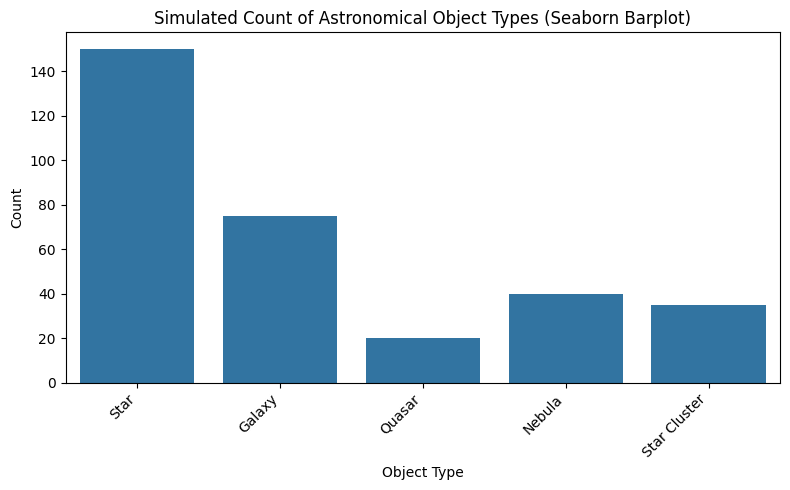

In [14]:
# Use the simulated object_types and object_counts

fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(x=object_types, y=object_counts, ax=ax)

ax.set_xlabel("Object Type")
ax.set_ylabel("Count")
ax.set_title("Simulated Count of Astronomical Object Types (Seaborn Barplot)")

plt.xticks(rotation=45, ha='right') # Rotate labels
plt.tight_layout() # Adjust layout

plt.show()

**Example 12:** Seaborn Countplot - Number of Each Exoplanet Type

`sns.countplot` will automatically count the occurrences of each category.

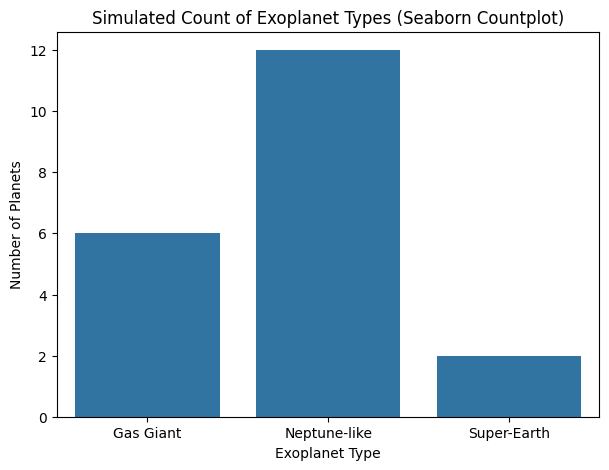

In [15]:
fig, ax = plt.subplots(figsize=(7, 5))

# Use sns.countplot, specifying the dataframe and the column with categories
sns.countplot(data=exoplanets_df, x='Type', ax=ax)

ax.set_xlabel("Exoplanet Type")
ax.set_ylabel("Number of Planets")
ax.set_title("Simulated Count of Exoplanet Types (Seaborn Countplot)")

plt.show()

## Exercises

Use Matplotlib and/or Seaborn to create plots based on the simulated data or your own variations.

1. Recreate the Star Mass vs. Luminosity scatter plot from Example 1, but this time use Seaborn (`sns.scatterplot`) and the `star_masses` and `star_luminosities` NumPy arrays directly (Seaborn can often handle arrays too).
2. Recreate the Variable Star Light Curve line plot from Example 3. Choose a different color (e.g., 'darkgreen') and a dashed line style (`linestyle='--'`).
3. Recreate the Galaxy Redshift Histogram from Example 4. Try using `bins=30` and add an edge color to the bars (`edgecolor='black'`).
4. Recreate the Object Type Bar Plot from Example 5, but make it a horizontal bar plot instead using `ax.barh()`. You'll need to swap the x and y arguments accordingly (`ax.barh(category_labels, category_values)`).
5. Recreate the Exoplanet Period vs. Radius scatter plot from Example 2, but swap the axes so Radius is on the x-axis and Period is on the y-axis. Use Matplotlib.
6. Using the `exoplanets_df`, create a scatter plot of 'Orbital_Period_Days' vs. 'Radius_Earth'. Use the `size` argument in `sns.scatterplot` to make the size of the points proportional to the 'Radius_Earth'. Set the x-axis to logarithmic scale.
7. Recreate the Exoplanet Type countplot from Example 12 as a horizontal bar plot using `sns.countplot(data=dataframe, y='category_column', ax=...)`.
8. Create a Matplotlib Figure with two Axes side-by-side (e.g., `fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))`). Plot the Star Mass vs. Luminosity scatter on `ax1` and the Galaxy Redshift histogram on `ax2`. Add titles and labels to both axes. Ensure `plt.tight_layout()` is called before `plt.show()`.

## Summary

You've taken important steps in visualising data using Python's powerful libraries, Matplotlib and Seaborn! You were introduced to:

*   The critical role of visualisation in understanding data.
*   The distinct but complementary roles of **Matplotlib** (foundational plotting) and **Seaborn** (statistical graphics).
*   The basic components of a Matplotlib plot: the **Figure** (canvas) and **Axes** (plotting area).
*   Creating fundamental plot types: **Scatter Plots** (relationships), **Line Plots** (trends), **Histograms** (distributions), and **Bar Plots** (comparisons).
*   Adding essential plot elements for clarity: **labels**, **titles**, and **legends**.
*   Using **Seaborn** to simplify the creation of common statistical plots, leverage better default aesthetics, and integrate seamlessly with DataFrames, including using the `hue` parameter to color points by category.
*   Applying these visualization techniques to **simulated astronomical data**.

Visualisation is an important skill in any data-driven field, including astronomy. These tools will empower you to explore your datasets, identify patterns, and communicate your findings effectively.  


**Additional Resources**
The hands-on examples provided in this notebook are not exhaustive. Hence, we have provided links to resources you can explore to learn how to make beautiful plots in your Data Science journey.

* Check out the Using Matplotlib page: <https://matplotlib.org/stable/users/index.html>

* Matplotlib Example Gallery page: <https://matplotlib.org/stable/gallery/>

<div style="text-align: center;">
  <img src="https://docs-us.oss-us-west-1.aliyuncs.com/images/py-dataviz-lib/seaborn.png" width="800"/>
</div>

* Seabron Example Gallery: <https://seaborn.pydata.org/examples/index.html>